In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('colorblind'))

In [2]:
df = pd.concat([pd.read_csv(i) for i in glob('*.csv')])
#Study Area'] == 'Tuolumne']
#df = pd.read_csv('all_results.csv')

In [3]:
a = df.copy().groupby('Study Area').mean()
clpx_mean_thresh = a.loc['CLPX']['Inflection Threshold']
hv_mean_thresh = a.loc['Happy Valley']['Inflection Threshold']
tuol_mean_thresh = a.loc['Tuolumne']['Inflection Threshold']
a

,CV,Drift Area %,Drift Threshold (% of mean depth),Drift Threshold (% of mean depth).1,Drift Volume %,Drift Volume-Area Difference (%),Drift Volume-Area Difference Slope,Inflection Threshold,Mean Depth [m],Not Drift Area %,Not Drift Volume %,SD Depth [m],Year,drift_area,drift_volume,mean_drift_depth,mean_not_drift_depth,not_drift_area,not_drift_volume
Study Area,,,,,,,,,,,,,,,,,,,
CLPX,0.571893,24.747966,140.0,140.0,37.126870,12.378904,-0.956131,141.666667,0.518072,75.252034,62.873153,0.300254,2015.166667,2.197575e+07,1.718352e+07,0.951885,0.411049,6.675997e+07,2.910342e+07
Happy Valley,0.389272,22.696180,140.0,140.0,31.030038,8.333858,-0.661053,135.000000,0.553468,77.303820,68.969950,0.209562,2015.166667,5.681561e+06,4.258095e+06,0.949754,0.475030,1.933581e+07,9.736635e+06
Tuolumne,0.668808,9.206715,140.0,140.0,47.542075,38.335360,-3.959433,122.500000,1.502550,24.126619,52.457708,1.002405,2014.000000,3.062770e+04,2.396244e+05,2.936897,1.131497,8.026130e+04,2.655880e+05


In [4]:
a.to_csv('drift_defintion_results_mean_by_study_area.to_csv')

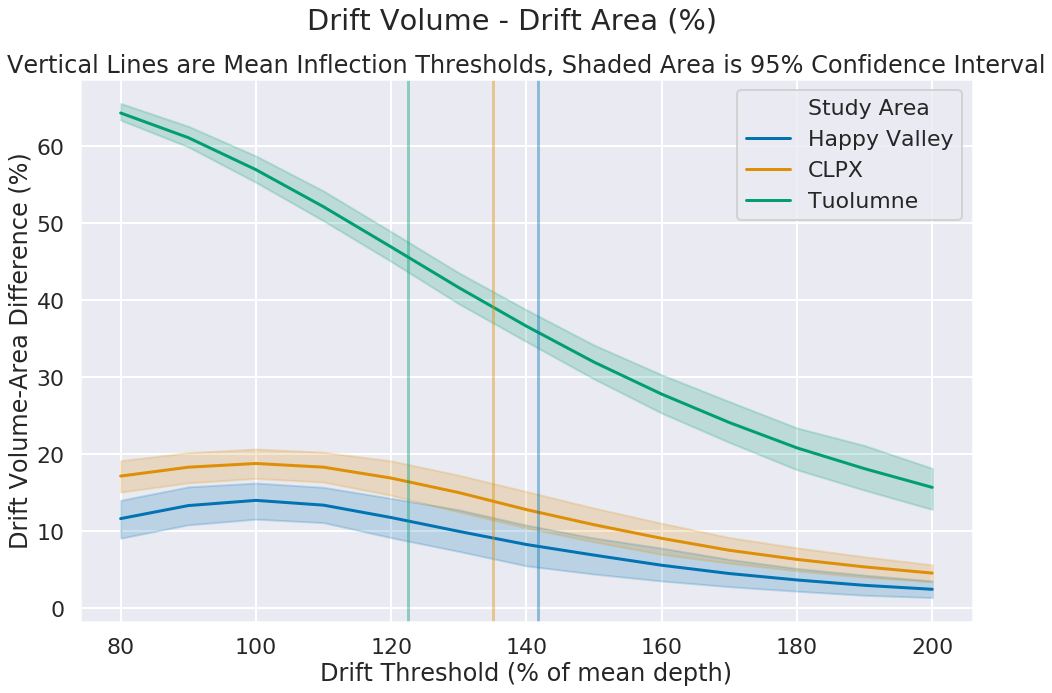

In [137]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Drift Threshold (% of mean depth)", y="Drift Volume-Area Difference (%)",
             hue="Study Area", ci=95, data=df)
plt.axvline(x=clpx_mean_thresh, alpha=0.4, c=sns.color_palette('colorblind')[0])
plt.axvline(x=hv_mean_thresh, alpha=0.4, c=sns.color_palette('colorblind')[1])
plt.axvline(x=tuol_mean_thresh, alpha=0.4, c=sns.color_palette('colorblind')[2])
plt.suptitle('Drift Volume - Drift Area (%)')
plt.title('Vertical Lines are Mean Inflection Thresholds, Shaded Area is 95% Confidence Interval')
plt.savefig('delta_curves_thresholds_study_area_hue.png', dpi=300, bbox_inches='tight')

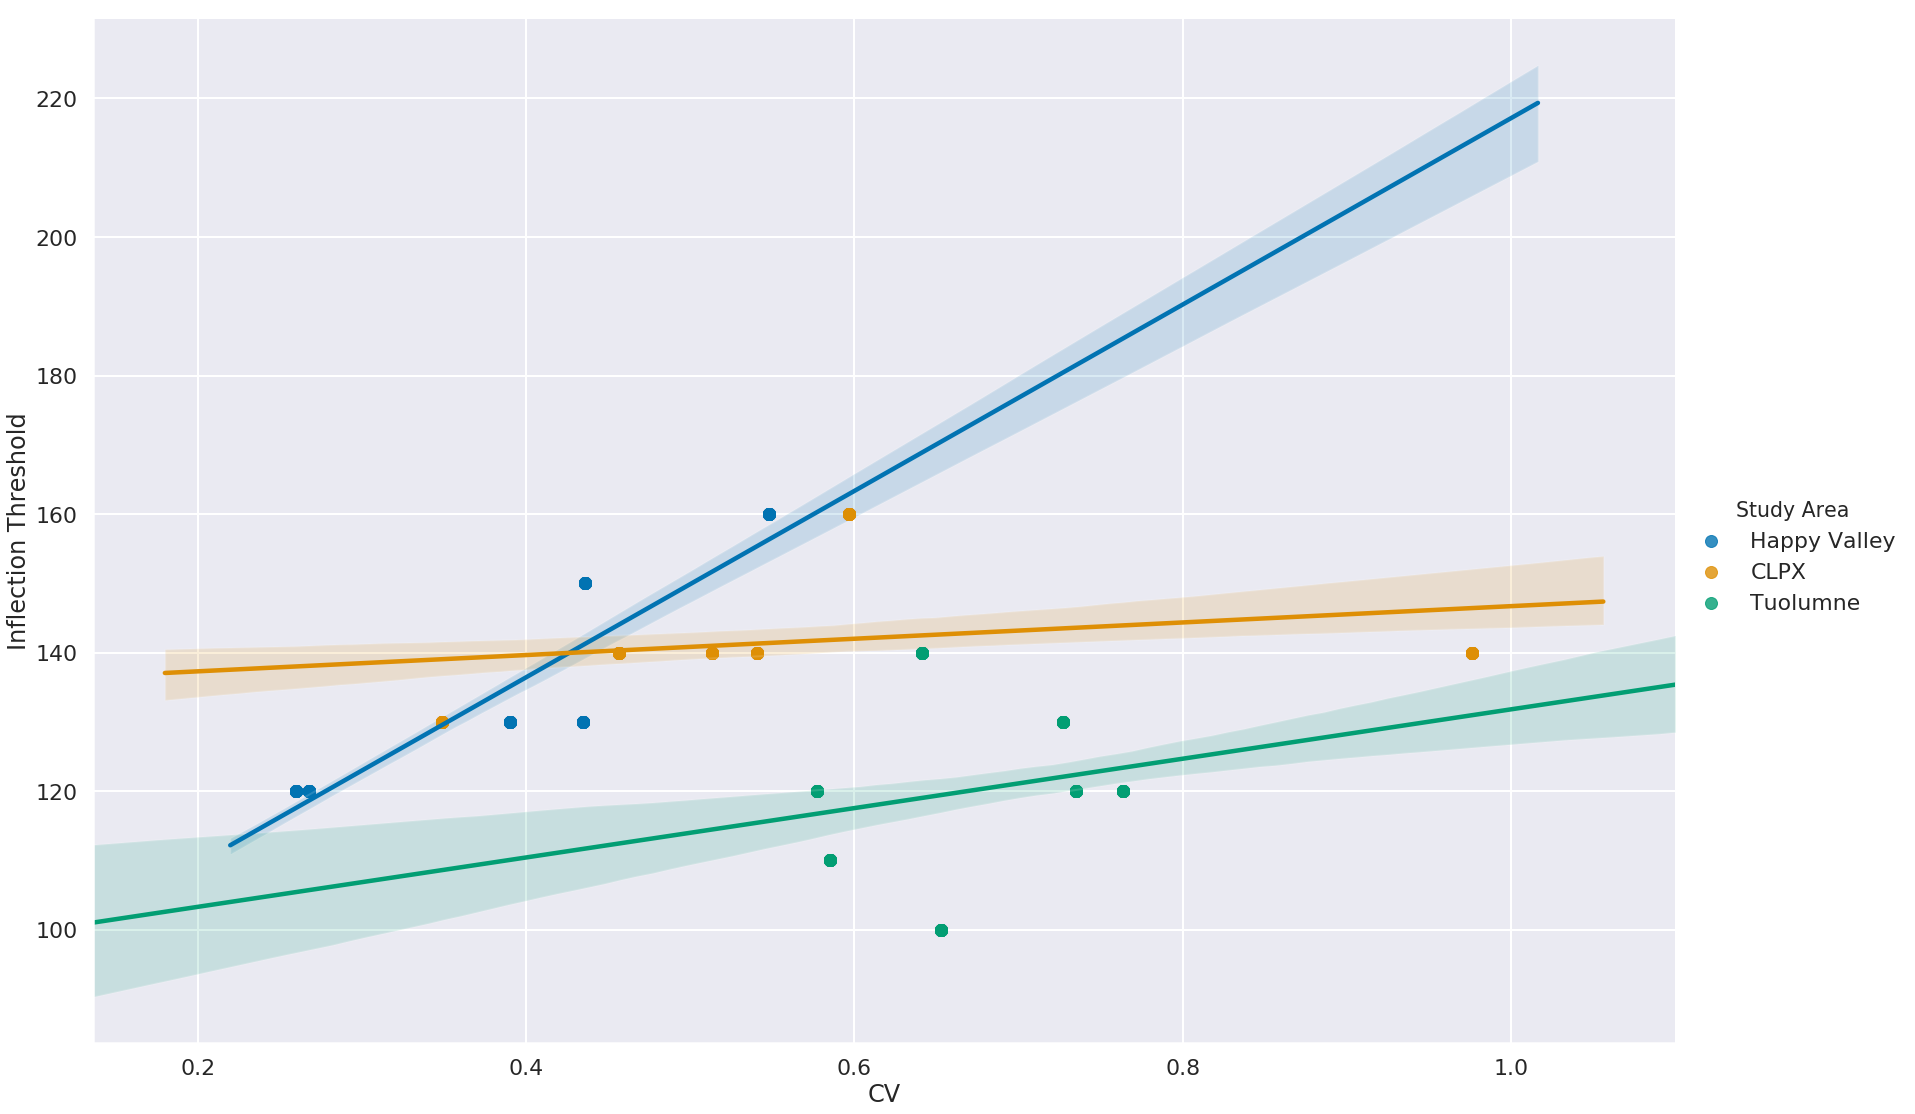

In [168]:
#plt.figure(figsize=(16,6))
ax = sns.lmplot(x="CV", y="Inflection Threshold", hue='Study Area', data=df, height=16, aspect=1.5)

In [29]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Drift Threshold (% of mean depth)", y="Drift Volume-Area Difference",
             hue="Study Area", style="Year",
             data=df)

In [14]:
#df2.set_index(['Study Area', 'Year'], inplace=True)

In [52]:
df2 = df.copy()
a = df2.groupby(['Study Area','Year'])
a['Drift Volume-Area Difference'].apply(lambda x: np.gradient(x).argmin())

Study Area    Year
CLPX          2012    8
              2013    5
              2015    6
              2016    6
              2017    6
              2018    6
Happy Valley  2012    5
              2013    5
              2015    4
              2016    4
              2017    7
              2018    8
Name: Drift Volume-Area Difference, dtype: int64

In [57]:
pcts = np.arange(0.8,2.1,0.1) * 100
idx = a['Drift Volume-Area Difference'].apply(lambda x: np.gradient(x).argmin()).values

In [62]:
p = []
for i in idx:
    p.append(pcts[i])
np.mean(p)

138.33333333333334

In [67]:
df3 = df.copy()
a = df2.groupby('Drift Threshold (% of mean depth)').mean()
a['gradient'] = np.gradient(a['Drift Volume-Area Difference'])
a.gradient

Drift Threshold (% of mean depth)
80.0     1.425128
90.0     1.002466
100.0    0.014717
110.0   -1.032833
120.0   -1.676681
130.0   -1.900184
140.0   -1.817389
150.0   -1.607581
160.0   -1.428148
170.0   -1.162198
180.0   -0.923513
190.0   -0.747239
200.0   -0.658239
Name: gradient, dtype: float64

In [69]:
a.gradient.argmin()

/home/cparr/apps/miniconda3/envs/data-scratchbook/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


129.99999999999997

In [70]:
clpx17 = pd.read_csv('drift_thresholds_CLPX_2017.csv')
clpx17.head()

,Unnamed: 0,drift_area,drift_volume,mean_drift_depth,mean_not_drift_depth,not_drift_area,not_drift_volume,Drift Threshold (% of mean depth),Drift Area %,Not Drift Area %,Drift Volume %,Not Drift Volume %,Drift Volume-Area Difference,Year,Study Area
0,0.43 m,60595359.0,40922684.0,0.675344,0.276251,33669474.0,9301241.0,80.0,64.282041,35.717959,81.480375,18.519523,17.198334,2017,CLPX
1,0.48 m,52597641.0,37282396.0,0.708823,0.310590,41667192.0,12941419.0,90.0,55.797734,44.202266,74.232267,25.767412,18.434533,2017,CLPX
2,0.53 m,44495913.0,33191504.0,0.745945,0.342229,49768920.0,17032366.0,100.0,47.203089,52.796911,66.086970,33.912819,18.883881,2017,CLPX
3,0.59 m,35256861.0,28021924.0,0.794793,0.376254,59007972.0,22201968.0,110.0,37.401924,62.598076,55.793918,44.205915,18.391994,2017,CLPX
4,0.64 m,28373307.0,23792008.0,0.838535,0.401142,65891526.0,26431854.0,120.0,30.099567,69.900433,47.371813,52.627960,17.272246,2017,CLPX


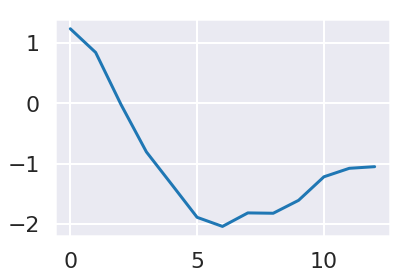

In [73]:
plt.plot(np.gradient(clpx17['Drift Volume-Area Difference']))